在正式开始之前，先介绍一些我们的新朋友
上节课我们使用的线性回归，这是目标函数
$$ f_{w,b}(x) = wx + b $$
均方误差，其损失函数是这样子的
$$ L(w,b) = \frac{1}{2}(wx + b - {y})^2 $$
对应的代价函数是这样的
$$ J(w,b) = \frac{1}{m}\sum_{i=1}^{m}(wx + b - {y})^2$$
对应的梯度下降方程是这样的（求导过程省略了，太简单了）
$$ w = w - \alpha \frac{\partial J(\hat{y})}{\partial w} $$
$$ b = b - \alpha \frac{\partial J(\hat{y})}{\partial w} $$
其中
$$ \frac{\partial J(w,b)}{\partial w} = \frac{1}{m}\sum_{i=1}^{m}(wx^{(i)} + b - y)x^{(i)} $$
$$ \frac{\partial J(w,b)}{\partial b} = \frac{1}{m}\sum_{i=1}^{m}(wx^{(i)} + b - y) $$


现在轮到逻辑回归了
逻辑回归的目标函数是sigmoid函数，是这个
$$ g(z) = \frac{1}{1+e^{-z}} $$
$$ z = wx + b $$
使用损失函数为交叉熵
$$ L(w,b) = - y log(g(wx+b)) - (1-y)log(1-g(wx+b)) $$
对应损失函数为
$$ J(w,b) = -\frac{1}{m}\sum_{i=1}^{m}[y log(g(wx+b)) + (1-y)log(1-g(wx+b))] $$
梯度下降方程一样，但求导过程我需要详细写一下
$$ \frac{\partial g(w,b)}{\partial w} = \frac{e^{-(wx+b)}}{(1+e^{-wx+b})^2}x = g^2(wx+b)xe^{-(wx+b)} $$
$$\begin{aligned}
\frac{\partial J(w,b)}{\partial w} &= \frac{\partial}{\partial w} (-\frac{1}{m}\sum_{i=1}^{m}[y log(g(wx+b)) + (1-y)log(1-g(wx+b))])\\
&= -\frac{1}{m}\sum_{i=1}^{m}[y\frac{g^2(wx+b)xe^{-(wx+b)}}{g(wx+b)}+(1-y)\frac{-g^2(wx+b)xe^{-(wx+b)}}{1-g(wx+b)}]\\
&= -\frac{1}{m}\sum_{i=1}^{m}[y\frac{g(wx+b)(1-g(wx+b))xe^{-(wx+b)}}{1-g(wx+b)}+(1-y)\frac{-g^2(wx+b)xe^{-(wx+b)}}{1-g(wx+b)}]\\
&= -\frac{1}{m}\sum_{i=1}^{m}[(\frac{g(wx+b)xe^{-(wx+b)}}{1-g(wx+b)})[y(1-g(wx+b))+(1-y)(-g(wx+b))]]\\
&= -\frac{1}{m}\sum_{i=1}^{m}[(\frac{\frac{1}{1+e^{-(wx+b)}}xe^{-(wx+b)}}{1-\frac{1}{1+e^{-(wx+b)}}})[y-yg(wx+b)-g(wx+b)+yg(wx+b)]]\\
&= -\frac{1}{m}\sum_{i=1}^{m}[(\frac{\frac{1}{1+e^{-(wx+b)}}xe^{-(wx+b)}}{\frac{e^{-(wx+b)}}{1+e^{-(wx+b)}}})[y-g(wx+b)]]\\
&= \frac{1}{m}\sum_{i=1}^{m}[x[g(wx+b)-y]]\\
&= \frac{1}{m}\sum_{i=1}^{m}(g(wx+b)-y)x
\end{aligned}$$
同理，对b求偏导可得
$$ \frac{\partial J(w,b)}{\partial b} = \frac{1}{m}\sum_{i=1}^{m}(g(wx+b)-y) $$

让我们进入正题吧

这次的任务是根据成绩两次成绩选人

数据分为前半部分后后半部分

前半部分是两个特征线性关系的逻辑回归

后半部分为两个特征非线性关系的逻辑回归，为了防止过拟合需要使用正则化。

In [1]:
# 先把库导入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# 然后是数据
data1 = pd.read_csv('ex2data1.txt', header=None, names=['exam1', 'exam2', 'admitted'])
data1.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


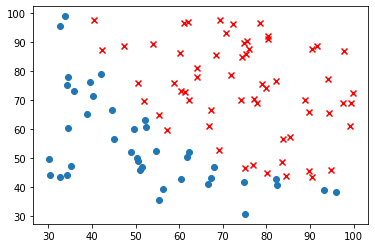

In [21]:
# 让我看看长什么样.jpg
data1_admitted = data1[data1['admitted'] == 1]
data1_unadmitted = data1[data1['admitted'] == 0]
plt.scatter(data1_admitted['exam1'], data1_admitted['exam2'], color='red', marker='x')
plt.scatter(data1_unadmitted['exam1'], data1_unadmitted['exam2'])

In [22]:
# sigmoid 启动！
def sigmoid(z):
    return 1/(1 + np.exp(-z))

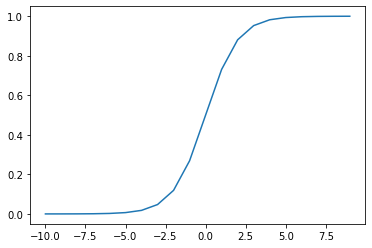

In [24]:
# 快速检查
nums = np.arange(-10, 10)
plt.plot(nums, sigmoid(nums))

$$ J(w,b) = -\frac{1}{m}\sum_{i=1}^{m}[y log(g(wx+b)) + (1-y)log(1-g(wx+b))] $$

In [64]:
def computeCost(X, y, w, b):
    first = np.multiply(y, np.log(sigmoid(X.dot(w) + b)))
    second = np.multiply(1 - y, np.log(1 - sigmoid(X.dot(w) + b)))
    return -np.mean(first + second)

$$ \frac{\partial J(w,b)}{\partial w} = \frac{1}{m}\sum_{i=1}^{m}(g(wx+b)-y)x $$

In [65]:
def gradientDescent(X, y, w, b, alpha, iters):
    cost = np.zeros(iters)
    for i in range(iters):
        error = sigmoid(X.dot(w) + b) - y
        w = w - alpha * np.mean(error[:,np.newaxis] * X, axis=0)
        b = b - alpha * np.mean(error)
        cost[i] = computeCost(X, y, w, b)
        if np.isnan(cost[i]):
            break
    return w, b, cost


In [89]:
X = data1.iloc[:, :-1]
y = data1.iloc[:, -1]
X = np.array(X)
y = np.array(y)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X.mean())/X.std()

In [98]:
w = np.array([0.01, 0.01])
b = 0.0

In [38]:
np.mean(X, axis=0)

array([65.64427406, 66.22199809])

In [97]:
alpha = 0.01
iters = 2000

In [99]:
w, b, cost = gradientDescent(X, y, w, b, alpha, iters)

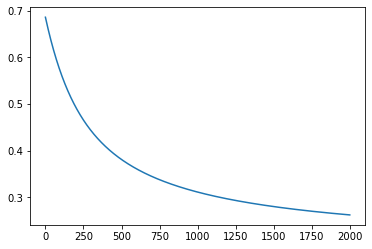

In [100]:
plt.plot(cost)

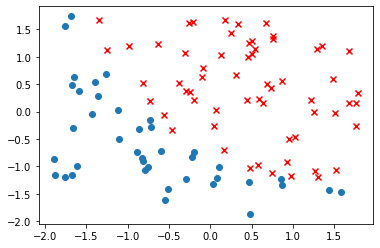

In [129]:
plt.scatter(X[data1_admitted.index][:,0], X[data1_admitted.index][:,1],color='red',marker='x')
plt.scatter(X[data1_unadmitted.index][:,0], X[data1_unadmitted.index][:,1])

In [130]:
# sigmoid反函数
def logit(g):
    return -np.log(1/g-1)

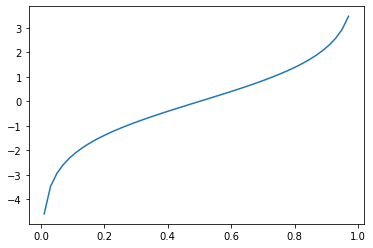

In [134]:
# 测试反函数
nums = np.arange(0.01, 0.99, step=0.02)
plt.plot(nums, logit(nums))

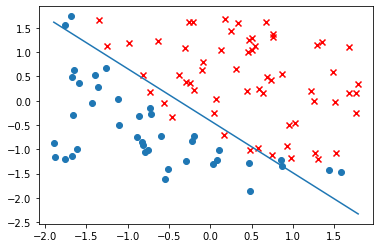

In [138]:
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_fit = np.linspace(X_min[0], X_max[0], 200)
Y_fit = logit(0.5)-(w[0]*X_fit + b)/w[1]
plt.scatter(X[data1_admitted.index][:,0], X[data1_admitted.index][:,1],color='red',marker='x')
plt.scatter(X[data1_unadmitted.index][:,0], X[data1_unadmitted.index][:,1])
plt.plot(X_fit,Y_fit)

状态良好，我们继续实现正则化逻辑回归吧

还是先导入数据

In [141]:
data2 = pd.read_csv('ex2data2.txt', names=['exam1', 'exam2', 'admitted'])
data2.head()

,exam1,exam2,admitted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [142]:
data2.describe()

,exam1,exam2,admitted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


In [164]:
data2_admitted = data2[data2['admitted']==1]
data2_unadmitted = data2[data2['admitted']==0]

In [161]:
X = data2.iloc[:,:-1]
X_mean = np.array(X.mean())
X_std = np.array(X.std())
X = np.array((X - X_mean) / X_std)
y = data2.iloc[:,-1]
y = np.array(y)

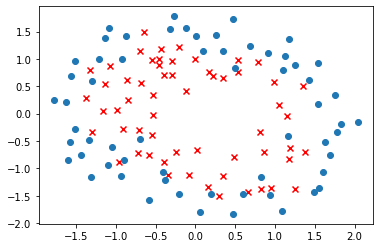

In [167]:
# 想图图了
plt.scatter(X[data2_admitted.index][:,0], X[data2_admitted.index][:,1], color='red', marker='x')
plt.scatter(X[data2_unadmitted.index][:,0], X[data2_unadmitted.index][:,1])